# TD N°2 explicabilité du dataset Boston Housing

### LABRE-BLANC Emma M2 ECAP IAE Nantes

1) Charger le dataset bostong_housing
   1) Disponible dans le folder 04_interpretable_ml/td/data/
   
2) Nettoyer votre jeu de données pour créer une régression linéaire et un random forest
   1) Tester d'ajouter des features log, quadratique, ...

3)Créer un modèle baseline linéaire et random forest

4) Interpréter le modèle linéaire

5) Tuner votre random forest

6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

6) Réaliser une explicabilité par individu
   1) En utilisant la méthode ICE (PDP individuelle)
   2) LIME (Model local pour expliquer une prédiction)
   3) SHAP watterfall plot (Contribution marginale de chaque variable dans la prédiction)

7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

## Contexte du Dataset

Le Boston Housing Dataset est un ensemble de données couramment utilisé en apprentissage automatique et en statistique pour étudier les relations entre diverses caractéristiques socio-économiques et immobilières dans la ville de Boston.  
Il contient des informations sur des propriétés résidentielles et leur environnement, et est souvent utilisé pour prédire la valeur des maisons, un problème classique de régression.

**Variable dispo**: 
- CRIM : taux de criminalité par habitant par ville
- ZN : proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés
- INDUS : proportion de terrains commerciaux non commerciaux par ville
- CHAS : variable binaire indiquant la proximité de la rivière Charles (= 1 si la zone délimitée par la ville touche la rivière ; 0 sinon)
- NOX : concentration des oxydes d'azote (en parties par 10 millions)
- RM : nombre moyen de pièces par logement
- AGE : proportion des unités occupées par leur propriétaire et construites avant 1940
- DIS : distances pondérées vers cinq centres d'emploi de Boston
- RAD : indice d'accessibilité aux autoroutes radiales
- TAX : taux d'imposition foncière par valeur totale pour chaque tranche de 10 000 dollars
- PTRATIO : ratio élèves-enseignants par ville
- LSTAT : pourcentage de la population de statut socio-économique inférieur
- MEDV : valeur médiane des maisons occupées par leur propriétaire (en milliers de dollars) - **variable cible**

In [249]:
#Web request
import requests
import io
import pandas as pd

In [251]:
import pandas as pd                 # for data manipulation and analysis
import numpy as np                  # for mathematical operations
import plotly.express as px         # for data visualization
import seaborn as sns               # for data visualization
import matplotlib.pyplot as plt     # for data visualization

# 1) Charger le dataset bostong_housing

In [254]:
#Télécharge directement depuis Github
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv" 
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

In [255]:
df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [258]:
df.shape

(506, 14)

Le dataset a correctement été importé. Il contient 506 observations et 14 variables.

# 2) Nettoyer votre jeu de données pour créer une régression linéaire et un random forest

Penser à :

- Vérifier comment encoder vos variables qualitatives pour la modélisation 
- Analyser les distributions
- Analyser les outliers 
- Analyser les corrélations

>Tester d'ajouter des features log, quadratique, ...

In [262]:
df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [264]:
# Retrait de unnamed
df = df.drop(columns=['Unnamed: 0'])

Tout d'abord nous pouvons constater qu'il n'y a aucune valeur manquante. Nous retirons également la colonne Unnamed qui ne contient pas d'informations pour la prédiction mais seulement les indices des observations.

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


Ensuite, nous observons que toutes les variables sont typées en float ou int. Cependant, pour les variables CHAS et RAD, il convient de les rendre catégorielles. En effet, CHAS est une variable binaire (0 ou 1) indiquant la proximité d’un logement par rapport à la rivière Charles. Si elle est traitée comme une variable numérique, le modèle pourrait interpréter "1" comme étant quantitativement supérieur à "0", alors qu'il s'agit simplement d'une présence ou d'une absence. De même, RAD, qui représente un index d'accessibilité aux autoroutes (valeurs de 1 à 24), ne suit pas nécessairement une relation linéaire avec Y. Par exemple, un logement avec RAD = 4 n'est pas nécessairement "deux fois plus proche" des autoroutes qu'un logement avec RAD = 2.

En les traitant comme des variables catégorielles, on permet aux modèles de machine learning d'analyser leurs effets sans imposer de relation numérique artificielle. Pour CHAS, cela clarifie son impact comme une simple distinction entre deux groupes. Pour RAD, cela évite au modèle de supposer une progression linéaire entre les différentes valeurs, ce qui pourrait biaiser les prédictions.

In [270]:
# Modification types
df["CHAS"] = df["CHAS"].astype('category')
df["RAD"] = df["RAD"].astype('category')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  LSTAT    506 non-null    float64 
 12  MEDV     506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


Les types des variables CHAS et RAD ont bien été modifiés en catégory.

## Variable cible : MEDV

A présent nous nous intéressons aux statistiques de la variable à prédire MEDV.

In [277]:
print(df['MEDV'].describe().round(3))

count    506.000
mean      22.533
std        9.197
min        5.000
25%       17.025
50%       21.200
75%       25.000
max       50.000
Name: MEDV, dtype: float64


Nous constatons qu'en moyenne, la valeur médiane des maisons occupées par leur propriétaire est de 22.533 (en milliers de dollars). Le maximum est 50.000 et le minimum est 5.000 (milliers de dollars).

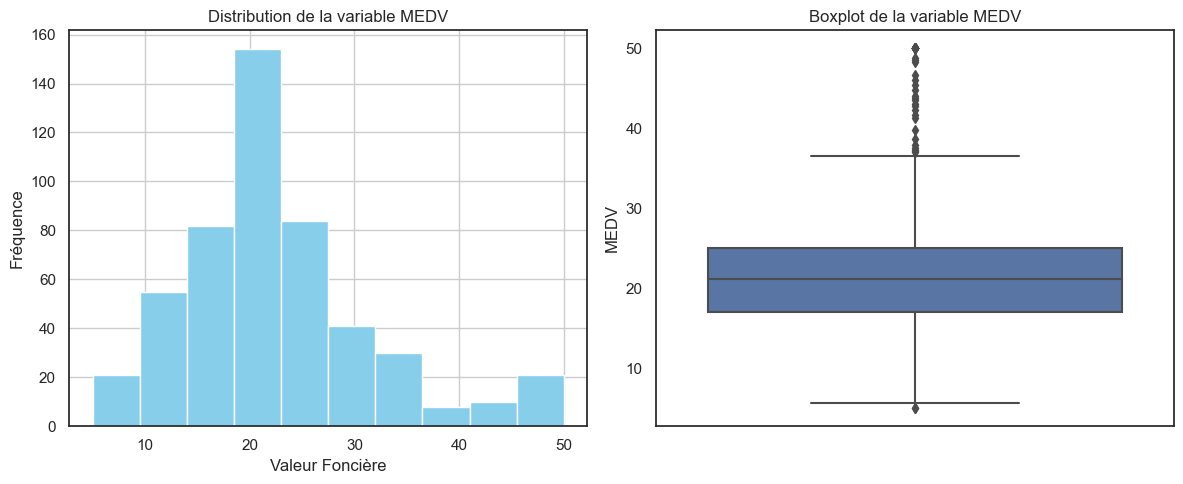

In [280]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 ligne, 2 colonnes

# Histogramme de MEDV (Distribution)
df['MEDV'].hist(bins=10, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution de la variable MEDV")
axes[0].set_xlabel("Valeur Foncière")
axes[0].set_ylabel("Fréquence")

# Boxplot de MEDV (Outliers)
dfBox1 = pd.melt(df[['MEDV']])  # Double crochets pour un DataFrame
sns.boxplot(y=df["MEDV"], ax=axes[1])
axes[1].set_title("Boxplot de la variable MEDV")

plt.tight_layout()  # Ajustement de l'affichage
plt.show()

Concernant la distribution elle ne semble pas suivre une distribution normale avec des valeurs extrêmes élevées.

## Variables quantitatives

A propos des variables quantitatives qui seront utilisées pour la prédiction nous pouvons regarder leurs statistiques et distributions.

In [285]:
# Statistiques descriptives des variables quantitatives
df.drop(columns=["MEDV"]).describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,37.970000


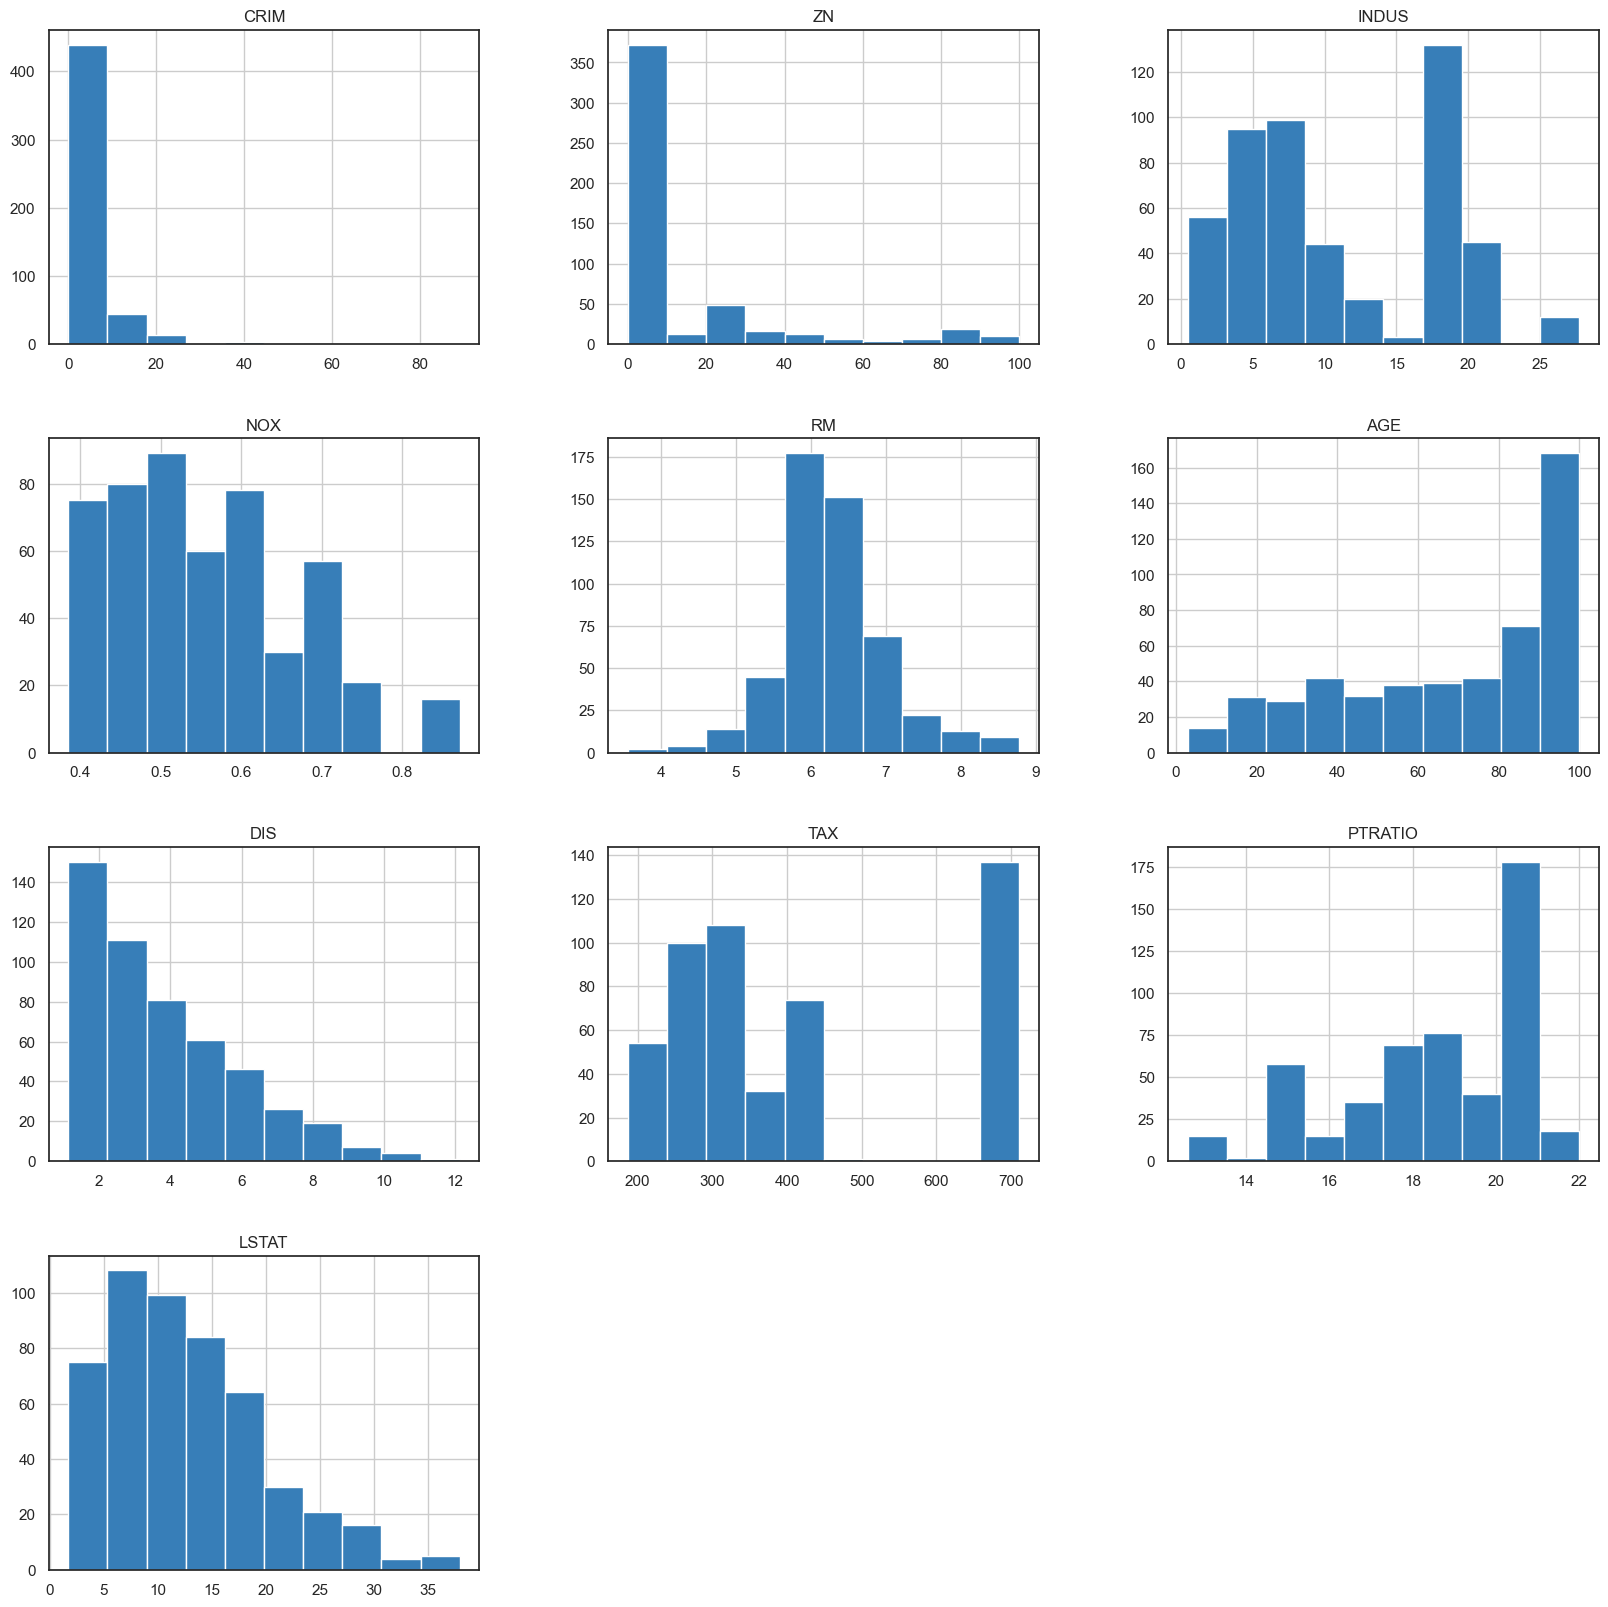

In [287]:
# Distributions
df.drop(columns=["MEDV"]).hist(figsize=(20, 20), color="#377eb8")
plt.show()

Les valeurs des variables CRIM et ZN semblent concentrées vers 0 tandis que la distribution de la variable DIS décroit au fur et à mesure que les valeurs augmentent tout comme pour LSTAT. Seule la variable RM semble avoir une distribution qui se rapproche de celle de la loi Normale. Pour la variable TAX, certaines valeurs ne sont pas représentées.

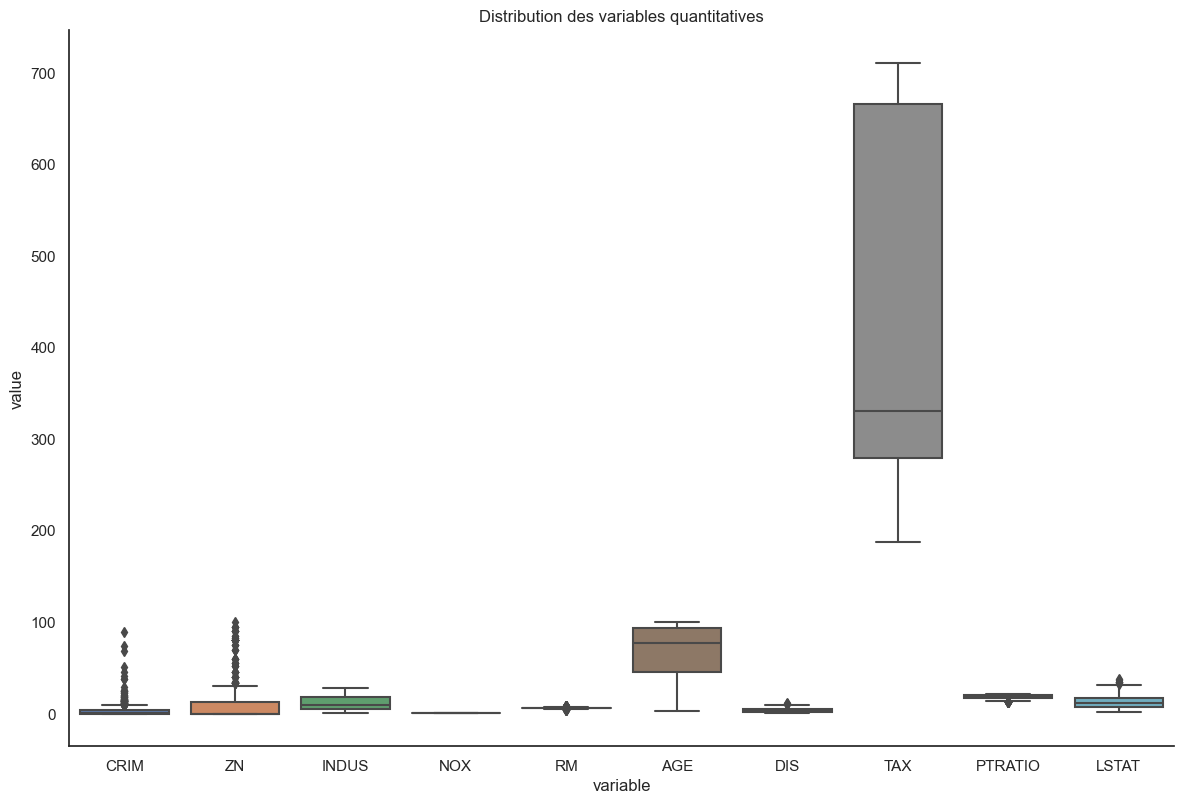

In [289]:
# Analyse des outliers
import seaborn as sns
df_quanti = df.drop(columns=['CHAS', 'RAD', 'MEDV'])
dfBox = pd.melt(df_quanti)
sns.catplot(x='variable', y='value', data=dfBox, kind='box', height=8, aspect=1.5)
plt.title("Distribution des variables quantitatives")
plt.show()

A l'aide de ces boxplots, nous pouvons voir qu'il semble y avoir des valeurs extrêmes pour certaines variables, nous reviendrons sur ce point par la suite. 

## Variables qualitatives

Concernant les variables qualitatives de notre jeu de données, nous pouvons relever qu'il y a davantage de maison situées dans des villes ne touchant pas la rivière Charles (471 contre 35). La représentation de la catégorie 1 est alors pas top. Et a propos de l'accessibilité aux autoroutes radiales, toutes les modalités sont plus ou moins bien représentées. On note notamment une surreprésentation des modalités 4, 5 et 24.

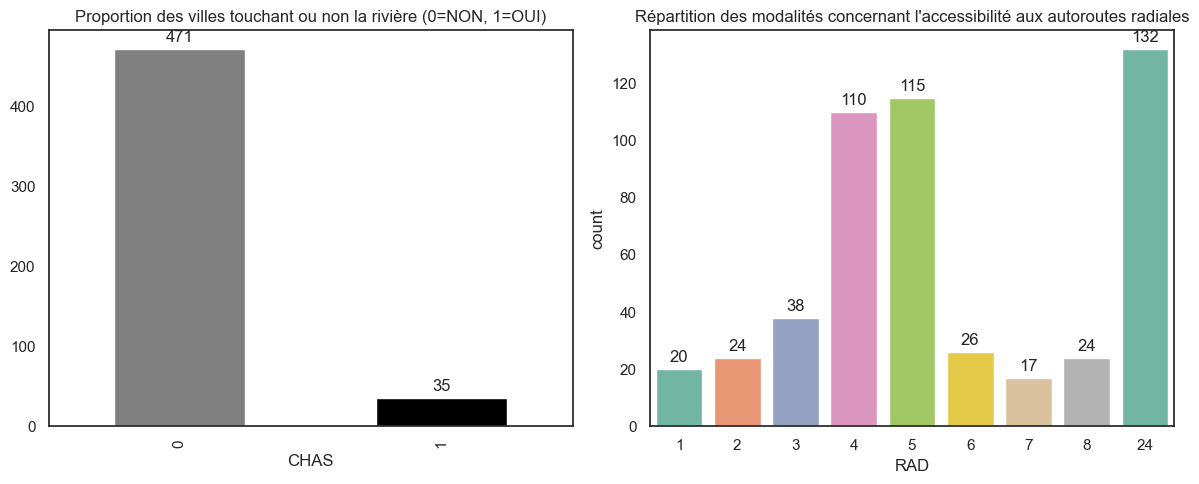

In [295]:
# Distributions

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphique pour CHAS
p1 = df["CHAS"].value_counts().plot(kind='bar', ax=axes[0], 
                                    title="Proportion des villes touchant ou non la rivière (0=NON, 1=OUI)",
                                    color=["grey", "black"])
axes[0].set_xlabel("CHAS")
# Ajout des labels
for container in p1.containers:
    p1.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Graphique pour RAD
p2 = sns.countplot(ax=axes[1], x="RAD", data=df, palette="Set2")
axes[1].set_title("Répartition des modalités concernant l'accessibilité aux autoroutes radiales")
axes[1].set_xlabel("RAD")
# Ajout des labels
for bar in p2.patches:
    height = bar.get_height()
    p2.annotate(f'{int(height)}',  
                xy=(bar.get_x() + bar.get_width() / 2, height),  
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Analyse des corrélations et liens entre les variables

Nous analysons les corrélations afin de vérifier, d'une part, si nos variables explicatives sont fortement liées à la variable cible, et d'autre part, d'identifier d’éventuelles corrélations entre les variables explicatives. Une forte corrélation entre certaines variables pourrait affecter la qualité des modèles mis en place ainsi que leur interprétation, notamment avec des méthodes d'explicabilité comme PDP.

- Pour les variables quantitatives

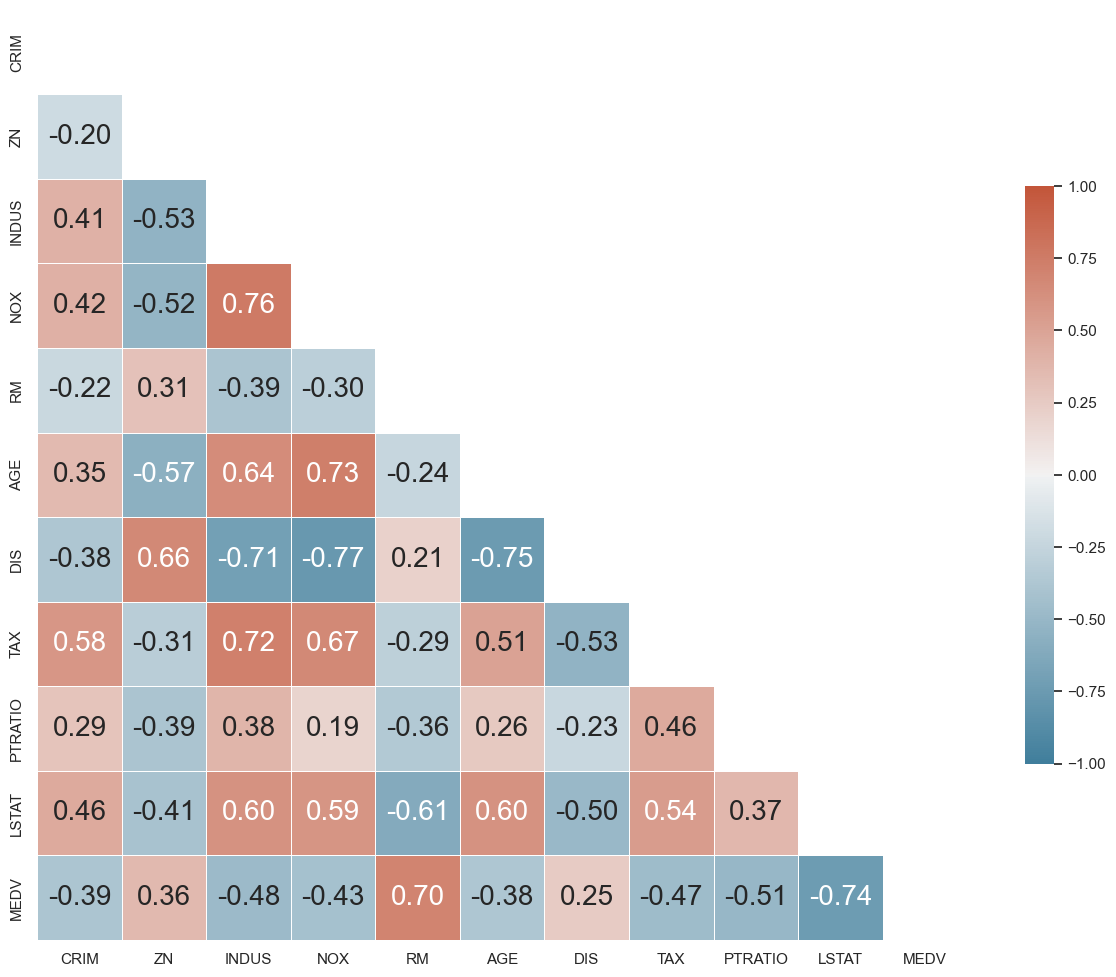

In [300]:
# Corrélations entre variables quantitatives
sns.set(style="white")
corr = df.drop(columns=['CHAS', 'RAD']).corr() 
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True,
            annot_kws={"size": 20},
            fmt='.2f'
            )
plt.show()

Nous observons que certaines variables explicatives sont fortement corrélées à la variable cible, notamment LSTAT et RM, avec des coefficients de corrélation respectifs de -0.74 et 0.70. Par ailleurs, certaines variables présentent également des corrélations marquées entre elles, comme NOX et INDUS, qui sont positivement corrélées, ce qui peut s’expliquer par le fait que les zones industrielles (INDUS) ont tendance à être associées à une pollution plus élevée (NOX). À l’inverse, DIS et NOX affichent une corrélation négative, ce qui pourrait être lié au fait que les zones plus éloignées des centres urbains (DIS) sont généralement moins exposées à la pollution (NOX).

Nous choisissons néanmoins de conserver l’ensemble des variables dans notre analyse afin de préserver toute l’information disponible pour le modèle. Cependant, il sera essentiel de faire attention à l’interprétation des méthodes d’explicabilité comme PDP et ICE, car la présence de corrélations fortes entre certaines variables pourrait biaiser la compréhension des effets individuels.

- Pour les variables qualitatives

Grâce aux boxplots représentant la distribution de la variable cible en fonction des modalités des variables catégorielles, ainsi qu’aux tests ANOVA, nous pouvons conclure que les variables CHAS et RAD semblent être liées à la valeur foncière.

En effet, pour la variable CHAS, on observe que les maisons situées dans une ville bordant la rivière Charles ont une valeur foncière médiane plus élevée que celles situées ailleurs. Concernant la variable RAD, la médiane de la valeur foncière est nettement plus faible pour les maisons ayant un accès routier de niveau 24, ce qui suggère un impact potentiel de l’accessibilité sur la valorisation immobilière.

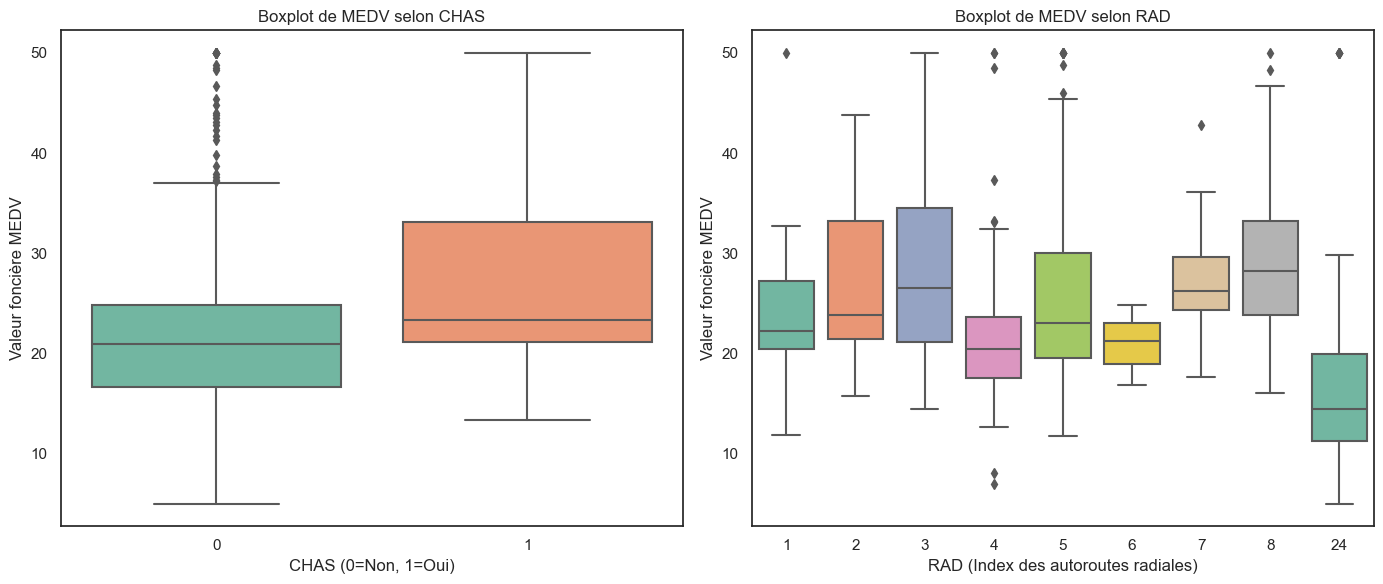

In [305]:
# Liens entre les variables catégorielles et la variable dépendante MEDV
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot pour CHAS
sns.boxplot(x='CHAS', y='MEDV', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Boxplot de MEDV selon CHAS')
axes[0].set_xlabel('CHAS (0=Non, 1=Oui)')
axes[0].set_ylabel('Valeur foncière MEDV')

# Boxplot pour RAD
sns.boxplot(x='RAD', y='MEDV', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Boxplot de MEDV selon RAD')
axes[1].set_xlabel('RAD (Index des autoroutes radiales)')
axes[1].set_ylabel('Valeur foncière MEDV')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

In [307]:
# Test ANOVA pour CHAS
import scipy.stats as stats
f_stat_chas, p_val_chas = stats.f_oneway(df[df['CHAS'] == 0]['MEDV'], df[df['CHAS'] == 1]['MEDV'])
print(f"\nANOVA pour CHAS : F-statistique = {f_stat_chas:.3f}, p-value = {p_val_chas:.5f}")

# Test ANOVA pour RAD
f_stat_rad, p_val_rad = stats.f_oneway(*[df[df['RAD'] == i]['MEDV'] for i in df['RAD'].unique()])
print(f"\nANOVA pour RAD : F-statistique = {f_stat_rad:.3f}, p-value = {p_val_rad:.5f}")



ANOVA pour CHAS : F-statistique = 15.972, p-value = 0.00007

ANOVA pour RAD : F-statistique = 18.416, p-value = 0.00000


## Identification et traitement des outliers

Il est essentiel de s'intéresser aux outliers, car ces valeurs atypiques peuvent avoir un impact significatif sur l'entraînement des modèles, faussant les estimations et réduisant la qualité des prédictions. Ils peuvent également influencer certaines métriques d’évaluation et altérer l’interprétabilité des résultats. Dans notre cas, après analyse, nous avons constaté que le nombre d'outliers était relativement faible. Nous avons donc choisi de les supprimer afin d’éviter qu’ils ne biaisent nos modèles, tout en minimisant la perte d’information sur l’ensemble des données.

In [311]:
from scipy.stats import zscore

# Calcul des Z-scores pour les colonnes numériques
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Convertir les Z-scores en DataFrame pour une manipulation plus facile
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Identifier les outliers : les Z-scores au-dessus de 3 ou en-dessous de -3
outliers = (z_scores_df > 3) | (z_scores_df < -3)

# Afficher les outliers par colonne
for column in outliers.columns:
    outliers_column = df[outliers[column]]  # Filtrer les lignes avec outliers pour chaque colonne
    if not outliers_column.empty:
        print(f"Outliers pour la colonne {column}:")
        print(outliers_column[[column]])  # Afficher la colonne concernée avec les outliers
        print("-" * 50)

Outliers pour la colonne CRIM:
        CRIM
380  88.9762
398  38.3518
404  41.5292
405  67.9208
410  51.1358
414  45.7461
418  73.5341
427  37.6619
--------------------------------------------------
Outliers pour la colonne ZN:
        ZN
55    90.0
56    85.0
57   100.0
199   95.0
200   95.0
201   82.5
202   82.5
203   95.0
204   95.0
256   90.0
283   90.0
284   90.0
347   85.0
353   90.0
--------------------------------------------------
Outliers pour la colonne RM:
        RM
225  8.725
257  8.704
262  8.398
364  8.780
365  3.561
367  3.863
374  4.138
406  4.138
--------------------------------------------------
Outliers pour la colonne DIS:
         DIS
351  10.7103
352  10.7103
353  12.1265
354  10.5857
355  10.5857
--------------------------------------------------
Outliers pour la colonne LSTAT:
     LSTAT
141  34.41
373  34.77
374  37.97
412  34.37
414  36.98
--------------------------------------------------


In [313]:
mask = ~(outliers.any(axis=1))

# Appliquer ce masque au DataFrame pour ne conserver que les lignes valides
df_cleaned = df[mask]

# Afficher la taille avant et après suppression des outliers
print(f"Taille initiale du dataset : {df.shape}")
print(f"Taille après suppression des outliers : {df_cleaned.shape}")

Taille initiale du dataset : (506, 13)
Taille après suppression des outliers : (469, 13)


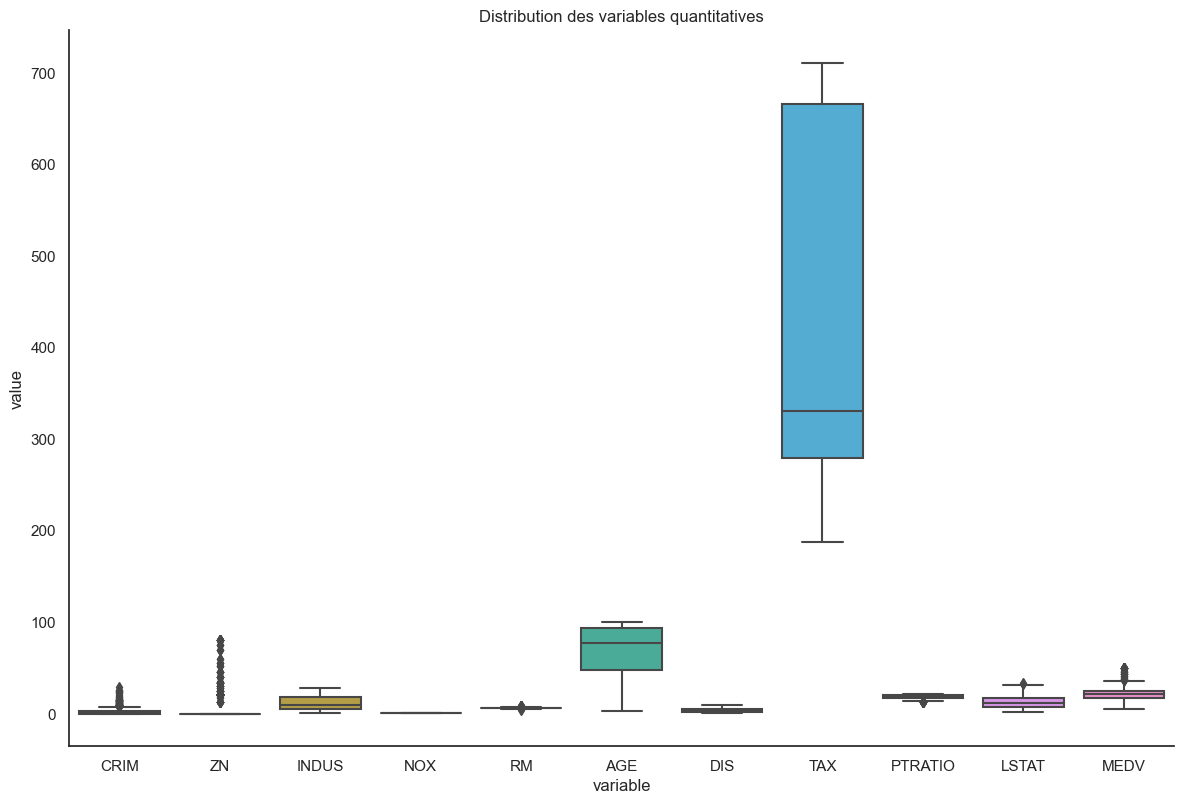

In [315]:
df_quanti_cleaned = df_cleaned.drop(columns=['CHAS', 'RAD'])
dfBox = pd.melt(df_quanti_cleaned)
sns.catplot(x='variable', y='value', data=dfBox, kind='box', height=8, aspect=1.5)
plt.title("Distribution des variables quantitatives")
plt.show()

# 3) Créer 2 modèles baseline, linéaire et random forest

Nous allons maintenant passer à la partie sur les modélisations. Pour cela, nous commençons par encoder les variables catégorielles afin de les rendre exploitables par les algorithmes de machine learning. Nous utilisons OrdinalEncoder pour la variable RAD et LabelEncoder pour CHAS. OrdinalEncoder est adapté pour RAD, car cette variable représente un niveau d'accessibilité croissant aux axes routiers. LabelEncoder est adapté pour CHAS, car c'est une variable binaire indiquant simplement la présence ou l'absence de la rivière à proximité.

## Encodage des variables catégorielles

In [320]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import pandas as pd

# Créer une copie du dataframe pour éviter de modifier l'original
dfEncoded = df_cleaned.copy()

# Liste des variables ordinales et catégorielles
ordinalColumns = ['RAD']
nominalColumns = ['CHAS']

# Encoder la variable ordinale 'RAD'
ordinalEncoder = OrdinalEncoder()
dfEncoded[ordinalColumns] = ordinalEncoder.fit_transform(dfEncoded[ordinalColumns])

# Encoder la variable nominale binaire 'CHAS' avec LabelEncoder (si c'est une variable binaire)
labelEncoder = LabelEncoder()
dfEncoded['CHAS'] = labelEncoder.fit_transform(dfEncoded['CHAS'])

# Vérification du résultat
dfEncoded.info()
dfEncoded.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     469 non-null    float64
 1   ZN       469 non-null    float64
 2   INDUS    469 non-null    float64
 3   CHAS     469 non-null    int64  
 4   NOX      469 non-null    float64
 5   RM       469 non-null    float64
 6   AGE      469 non-null    float64
 7   DIS      469 non-null    float64
 8   RAD      469 non-null    float64
 9   TAX      469 non-null    float64
 10  PTRATIO  469 non-null    float64
 11  LSTAT    469 non-null    float64
 12  MEDV     469 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.3 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,5.33,36.2


## Séparation du jeu de données en jeux train et test

Ensuite, nous séparons notre jeu de données en jeu d'entraînement et jeu de test afin de pouvoir entraîner nos modèles sur un sous-ensemble des données et évaluer leur performance sur un autre sous-ensemble, jamais vu par le modèle pendant l'apprentissage. Cela permet d'évaluer la capacité du modèle à généraliser sur de nouvelles données.

In [324]:
X = dfEncoded.drop(columns=['MEDV'])
y = dfEncoded['MEDV']

In [326]:
# Diviser les données en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardisation des données

Enfin, nous procédons à la standardisation des variables afin de rendre leur échelle comparable, ce qui permet d'évaluer correctement leur importance. Nous appliquons cette transformation sur les données d'entraînement, puis utilisons les mêmes paramètres pour standardiser les données de test, afin d'éviter le data leakage.

In [330]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques sans 'RAD' et 'CHAS'
numeric_columns = X_train.drop(columns=["RAD", "CHAS"]).columns

# Initialiser le scaler
scaler = StandardScaler()

# copie de X_train pour les données standardisées
X_train_se = X_train.copy()
X_test_non_se = X_test.copy()

# Standardisation uniquement sur les colonnes numériques de X_train_se
X_train_se[numeric_columns] = scaler.fit_transform(X_train_se[numeric_columns])

# Appliquer la même transformation sur X_test
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


# Modélisations

Nous passons à présent aux modélisations, nous utilisons dans ce td le modèle linéaire et le RandomForest.

## Modèle de régression linéaire

In [100]:
# Régression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_se, y_train)

# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"R2 : {r2}")

MSE : 10.30910671976337
RMSE : 3.210779768181457
R2 : 0.785070193282115


## Modèle Random Forest

In [103]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
modelrandom = RandomForestRegressor()
modelrandom.fit(X_train_se, y_train)

# Prédictions
y_predrandom = modelrandom.predict(X_test)

# Performance du modèle
from sklearn.metrics import mean_squared_error
mserandom = mean_squared_error(y_test, y_predrandom)
print(f"MSE : {mserandom}")
rmserandom = mean_squared_error(y_test, y_predrandom)**0.5
print(f"RMSE : {rmserandom}")
r2random = r2_score(y_test, y_predrandom)
print(f"R² : {r2random}")

MSE : 5.858011755319142
RMSE : 2.420332984388541
R² : 0.8778690173118373


# 4) Interpréter le modèle linéaire
Utiliser les méthodes intrinsèques du modèle pour l'interprétation

Nous pouvons dans cette partie interpréter les résultats du modèle linéaire.

In [106]:
# Afficher les résultats
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"R2 : {r2}")

MSE : 10.30910671976337
RMSE : 3.210779768181457
R2 : 0.785070193282115


Tout d'abord, nous observons que le modèle explique 78 % de la variance des données, avec un R² de 0,785, ce qui est un bon résultat. Le MSE et RMSE nous permettent également de comparer les performances de ce modèle avec le modèle RandomForest non tuner. Ainsi nous constatons que le modèle randomForest semble meilleur que le modèle linéaire. Nous chercherons à améliorer le modèle randomForest en tunant ses paramètres par la suite.

## importance

Concernant l'importance des variables, présentée ici en valeurs absolues, nous observons que les variables LSTAT, CHAS, RM et DIST, dans cet ordre, semblent avoir un poids plus important que les autres pour expliquer les variations des valeurs médianes des maisons occupées par leurs propriétaires. LSTAT et RM, comme nous l'avons vu dans l'analyse des corrélations, étaient en effet les variables les plus fortement corrélées à la variable cible.

In [115]:
beta = pd.DataFrame(np.abs(model.coef_),index=X.columns,columns=['abs(coef)'])
beta.sort_values(by='abs(coef)', ascending=False)

,abs(coef)
LSTAT,3.999083
CHAS,3.908824
RM,2.840592
DIS,2.384959
NOX,1.901218
PTRATIO,1.729281
TAX,0.674539
CRIM,0.545795
RAD,0.454204
ZN,0.220775


## Effets relatifs et p-values

En analysant les signes des coefficients et la significativité des variables, nous constatons que toutes les variables du modèle sont statistiquement significatives, ce qui signifie qu'elles contribuent de manière significative à la prédiction de la variable MEDV (valeur médiane des maisons occupées par leurs propriétaires). Nous observons que les variables CHAS et RM ont une influence positive sur la valeur des maisons. En effet, habiter près de la rivière Charles (variable CHAS) semble augmenter la valeur des maisons, tout comme le nombre moyen de pièces (variable RM), ce qui est cohérent avec l'idée que des maisons plus spacieuses et bien situées tendent à être plus chères.

En revanche, les variables LSTAT et DIS exercent une influence négative sur la valeur des maisons. Le pourcentage de la population de statut socio-économique inférieur (LSTAT) étant plus élevé, la valeur des maisons diminue, ce qui peut être expliqué par le fait que les zones avec une plus forte proportion de personnes à statut socio-économique inférieur peuvent être perçues comme moins attractives ou offrir moins de services, ce qui impacte négativement les prix. De même, la variable DIS, représentant la distance par rapport aux centres d'emplois de Boston, montre que plus la distance est grande, plus la valeur des maisons diminue. Cela s'explique par le fait que les maisons situées loin des zones d'emploi ou des infrastructures clés sont généralement moins recherchées et donc moins chères.

In [118]:
from sklearn.feature_selection import f_regression

# Coefficients
beta = pd.DataFrame(model.coef_, index=X.columns, columns=['coef'])

# P-values
_, p_values = f_regression(X_train_se, y_train)


beta['p_value'] = p_values
beta = beta.sort_values(by='coef', ascending=False)

beta

,coef,p_value
CHAS,3.908824,9.023654e-05
RM,2.840592,2.693804e-55
RAD,0.454204,4.751461e-06
ZN,0.220775,1.714289e-09
INDUS,0.034466,6.210946e-21
AGE,-0.025732,1.392753e-12
CRIM,-0.545795,1.297045e-17
TAX,-0.674539,6.649974e-18
PTRATIO,-1.729281,7.685490e-19
NOX,-1.901218,5.074949e-17


## Résidus

Finalement, nous pouvons également nous intéresser aux résidus, car ils permettent d'évaluer la qualité de notre modèle de manière plus approfondie. Les résidus nous aident à identifier si le modèle présente des biais systématiques, s'il y a des valeurs qui ne sont pas bien prédites ou si des patterns non capturés persistent. Nous constatons alors que certaines valeurs sont moins bien prédites, en particulier celles situées aux extrêmes de la distribution. Cela pourrait indiquer que le modèle a plus de difficulté à prédire ces points, ce qui pourrait être le signe de non-linéarité.

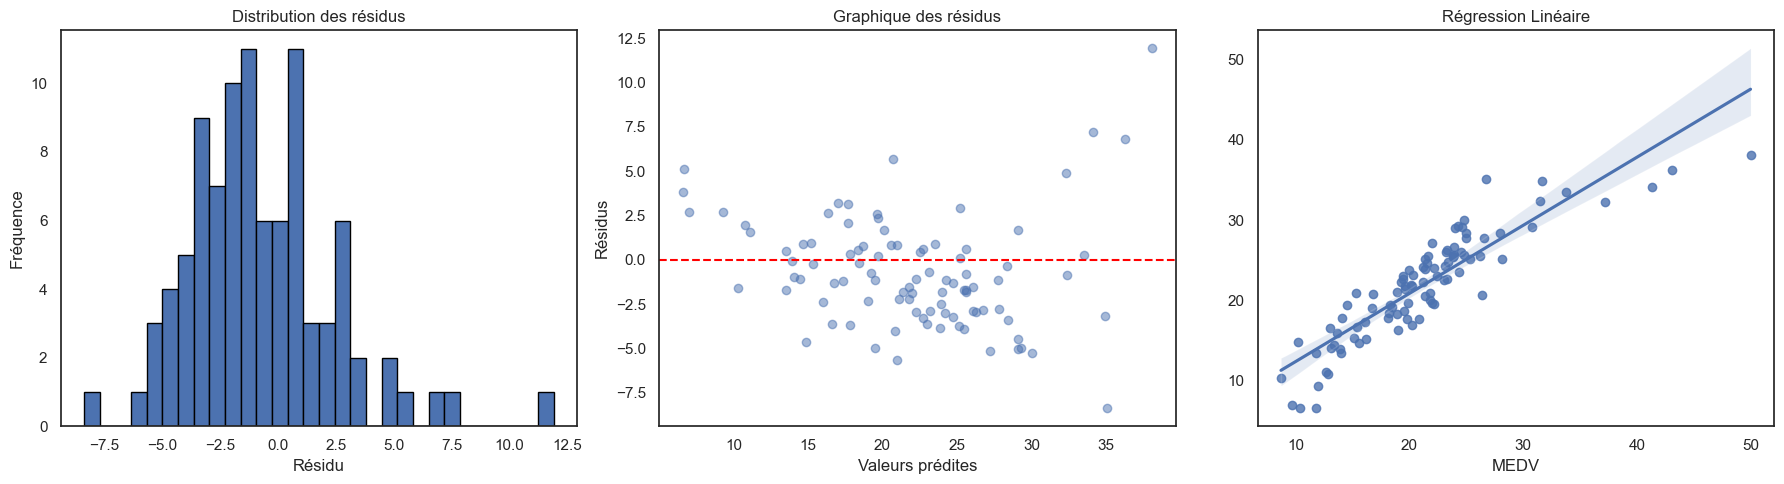

In [122]:
# Calcul des résidus
residuals = y_test - y_pred

# Création de la figure et des sous-graphes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogramme des résidus
axes[0].hist(residuals, bins=30, edgecolor='black')
axes[0].set_title("Distribution des résidus")
axes[0].set_xlabel("Résidu")
axes[0].set_ylabel("Fréquence")

# Graphique des résidus vs prédictions
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(0, color='red', linestyle='dashed')
axes[1].set_title("Graphique des résidus")
axes[1].set_xlabel("Valeurs prédites")
axes[1].set_ylabel("Résidus")

# Graphique de régression linéaire avec seaborn
sns.regplot(x=y_test, y=y_pred, ax=axes[2])
axes[2].set_title("Régression Linéaire")

# Ajustement de l'espace entre les graphiques
plt.tight_layout()

# Affichage
plt.show()

# 5) Tuner votre random forest

Nous pouvons reprendre notre modèle Random Forest et chercher à l'améliorer en optimisant ses paramètres. Pour ce faire, nous utilisons la méthode de GridSearch, qui permet d'effectuer une recherche exhaustive sur une grille de paramètres spécifiés afin de trouver la combinaison qui maximise la performance du modèle. Cette approche permet de tester plusieurs configurations et de sélectionner celle qui offre les meilleurs résultats. Finalement, grâce à cette optimisation, nous obtenons un modèle amélioré, avec un R² qui passe de 0,88 à 0,90 et un RMSE qui diminue de 2.42 à 2.16, ce qui témoigne d'une meilleure précision et d'une meilleure capacité prédictive.

In [126]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],        # Nombre d'arbres
    'max_depth': [None, 10, 20, 30],        # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],        # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4],          # Nombre minimum d'échantillons dans une feuille
    'max_features': ['sqrt', 'log2', None],  # Choisir parmi ces valeurs pour max_features
    'random_state': [42]                   
}

# GridSearchCV
grid_search = GridSearchCV(estimator=modelrandom, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraîner le modèle avec la recherche des meilleurs hyperparamètres
grid_search.fit(X_train_se, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_model_random = grid_search.best_estimator_

# Prédictions
y_predrandom_best = best_model_random.predict(X_test)

# Calcul de la performance du modèle
mserandom_best = mean_squared_error(y_test, y_predrandom_best)
rmserandom_best = mserandom_best ** 0.5
r2random_best = r2_score(y_test, y_predrandom_best)

# Afficher les résultats
print(f"MSE : {mserandom_best}")
print(f"RMSE : {rmserandom_best}")
print(f"R² : {r2random_best}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Meilleurs hyperparamètres :  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
MSE : 4.699434133643622
RMSE : 2.167817827596134
R² : 0.9020236672794246


# 6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

Nous allons maintenant passer à l'interprétation du modèle Random Forest en utilisant plusieurs méthodes d'interprétation globales. Les méthodes globales, qui visent à décrire le comportement général d'un modèle de machine learning, sont particulièrement utiles pour comprendre les mécanismes sous-jacents de notre modèle. Elles permettent ainsi de valider ou d'invalider le modèle en fonction de son adéquation avec les attentes théoriques. Dans cette section, nous commencerons par l'analyse des Partial Dependence Plots (PDP), puis nous poursuivrons avec l'importance des variables par permutation. Nous avions également envisagé d'utiliser l'ALE (Accumulated Local Effects), qui est une alternative aux PDP, particulièrement utile pour les modèles avec des variables fortement corrélées. Cependant, nous n'avons pas pu tester cette méthode en raison d'un échec de téléchargement de la librairie Alibi. Nous avons choisi de réaliser l'interprétation des résultats sur des données standardisées, car le modèle a été entraîné sur des données prétraitées de cette manière. En standardisant les variables, nous avons veillé à ce qu'elles aient toutes la même échelle, ce qui permet de garantir que le modèle ne privilégie pas certaines variables en raison de différences d'échelle. De plus, les méthodes d'explicabilité telles que LIME et SHAP sont sensibles à ces différences d'échelle, et les résultats seront donc plus cohérents et comparables si nous utilisons les données standardisées. Cette approche assure également une interprétation plus précise et fiable des relations entre les variables et la cible.

## Partial Dependance Plot (PDP)

Le Partial Dependence Plot (PDP) permet de visualiser l'effet marginal d'une ou deux variables, qu'elles soient quantitatives ou qualitatives, sur la variable cible que nous cherchons à prédire. Cette méthode nous aide à comprendre la nature de la relation entre une variable et la cible, qu'elle soit linéaire, non linéaire, monotone ou même plus complexe. Dans cette section, nous examinerons successivement les PDP des variables quantitatives, puis ceux des variables qualitatives.

- Variables quantitatives

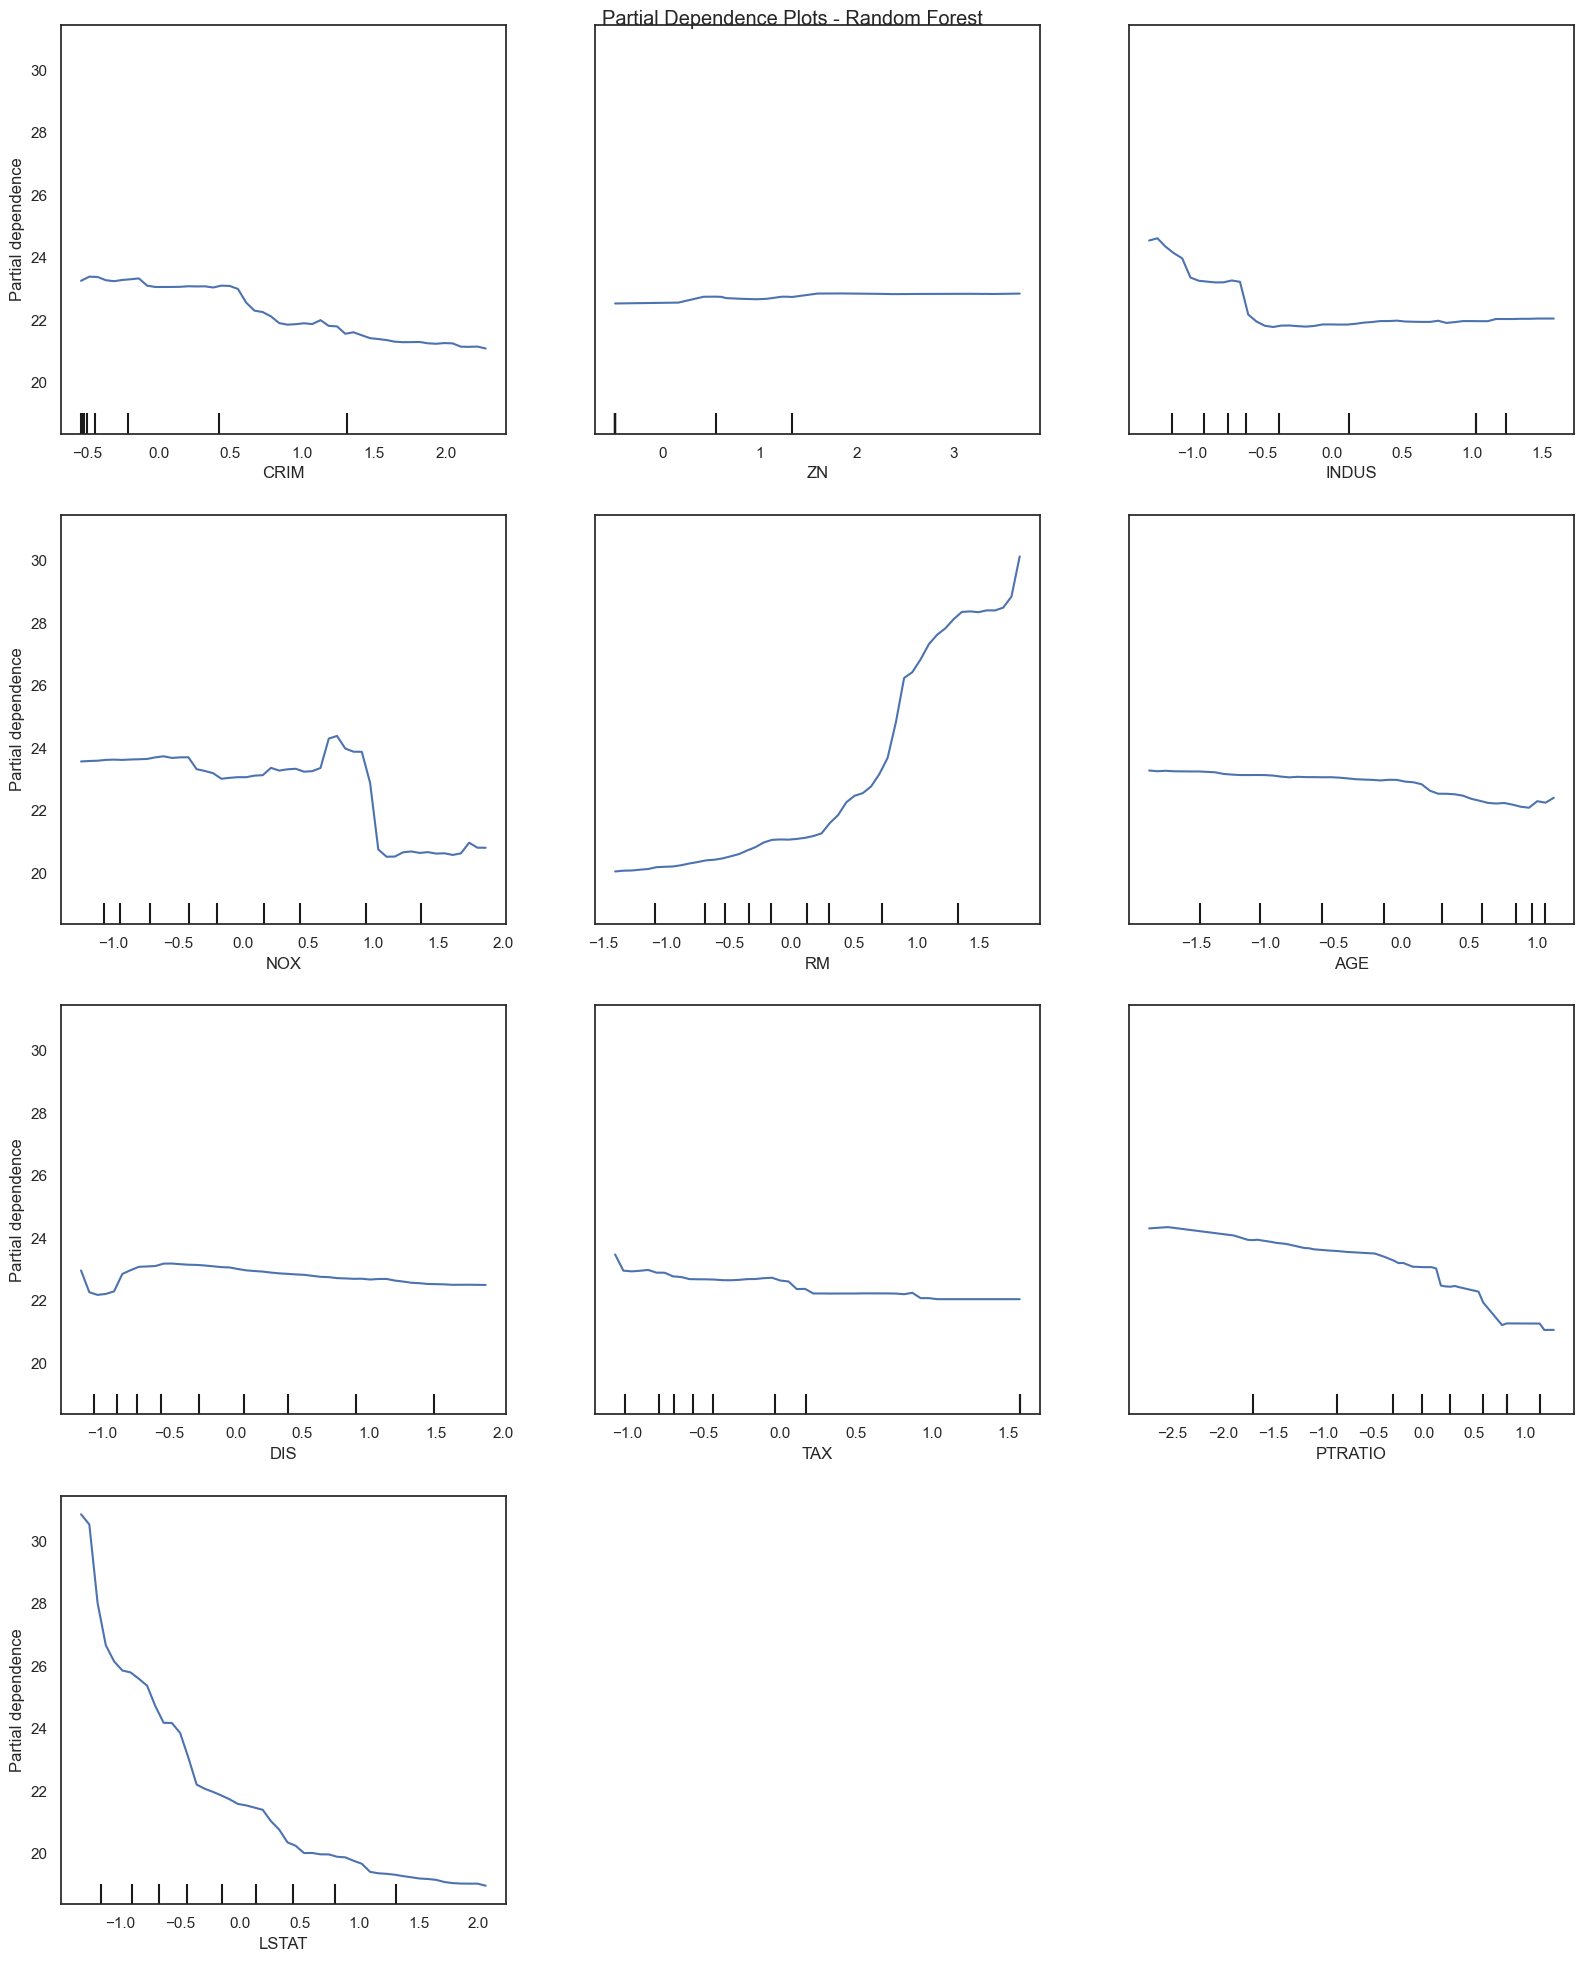

In [166]:
from sklearn.inspection import PartialDependenceDisplay

X_train_df = pd.DataFrame(X_train_se, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS","RAD", "TAX", "PTRATIO", "LSTAT"])

features = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "LSTAT"]  # Index des caractéristiques

_, ax1 = plt.subplots(figsize=(16, 20))

PartialDependenceDisplay.from_estimator(best_model_random,
                                         X_train_df,
                                         features,
                                         kind="average",
                                         grid_resolution=50,
                                         ax=ax1)

plt.suptitle("Partial Dependence Plots - Random Forest")
plt.tight_layout()
plt.show()

Pour les variables quantitatives on constate notamment que plus LSTAT augmente plus la valeur médiane de la maison va diminuer tandis que plus RM augmente plus la valeur médiane de la maison va augmenter. Pour les autres variables, l'effet marginal semble plus faible. On note tout de même un fort Pour les variables quantitatives, nous constatons plusieurs effets notables sur la valeur médiane des maisons. Tout d'abord, LSTAT (le pourcentage de la population ayant un statut socio-économique inférieur) présente une relation négative marquée avec la valeur médiane des maisons : plus LSTAT augmente, plus la valeur médiane de la maison tend à diminuer. Ce phénomène est probablement lié à des zones de la ville moins privilégiées, où les maisons ont généralement une valeur plus basse. À l'inverse, RM (le nombre moyen de pièces par logement) montre une relation positive, car une augmentation du nombre de pièces semble être associée à une hausse de la valeur médiane des maisons, ce qui est logique, car les maisons plus grandes et plus spacieuses ont généralement plus de valeur.

Pour les autres variables, l'effet marginal semble plus faible. Cependant, il y a des comportements intéressants pour certaines d'entre elles. Par exemple, NOX (la concentration en oxydes d'azote) montre un décrochage soudain lorsque sa valeur standardisée atteint 1, ce qui entraîne une chute brusque de la valeur de la maison. Ce phénomène peut s'expliquer par le fait que des niveaux élevés de pollution de l'air, mesurés par NOX, sont souvent associés à des quartiers moins recherchés, ce qui a un impact négatif sur la valeur foncière.

Pour PTRATIO (le ratio élèves/enseignants dans les écoles), nous observons un décrochage plus progressif. Enfin, pour INDUS (la proportion de terres utilisées pour l'industrie), nous observons une diminution par paliers au début, suivie d'une stagnation. Cette tendance pourrait s'expliquer par le fait que la proximité d'activités industrielles peut avoir un impact négatif sur la valeur des maisons, en raison des nuisances (pollution, bruit, etc.). Cependant, une fois qu'une certaine proportion d'activités industrielles est atteinte, l'impact marginal de l'augmentation d'INDUS sur la valeur foncière devient moins prononcé

- Variables catégorielles

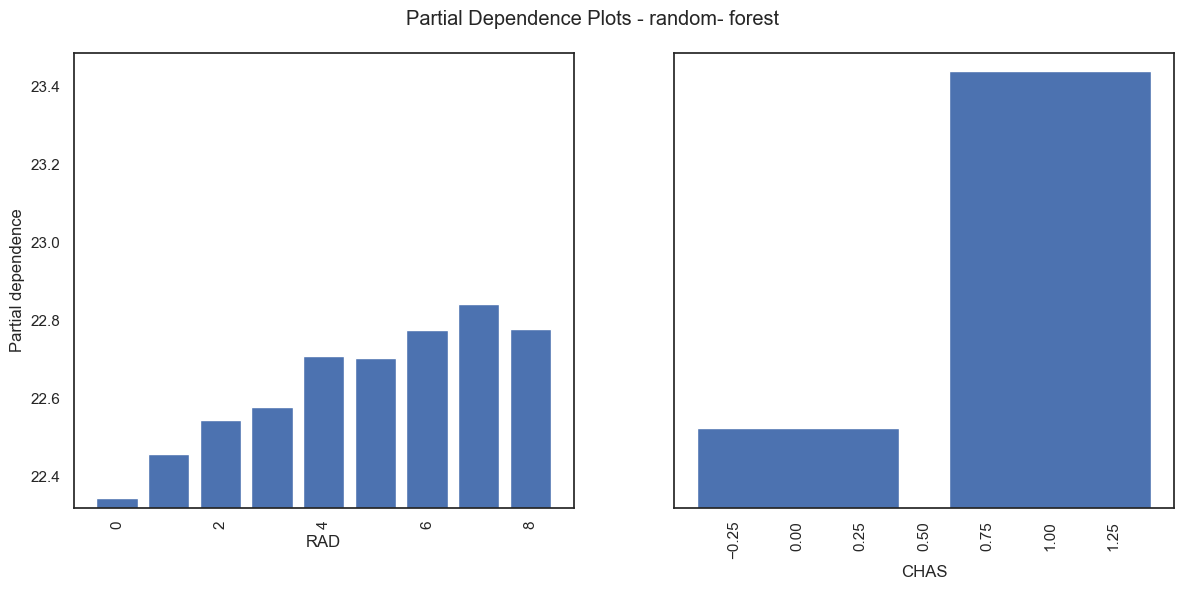

In [152]:
features = ["RAD", "CHAS"]  # Index des caractéristiques

_, ax1 = plt.subplots(figsize = (12,6))

PartialDependenceDisplay.from_estimator(best_model_random, 
                                         X_train_df, 
                                         features,
                                         categorical_features=["RAD", "CHAS"], # On spécifie ici les variables catégorielles
                                         kind="average",
                                         grid_resolution=50,
                                         ax = ax1
                                         )

plt.suptitle("Partial Dependence Plots - random- forest")
plt.tight_layout()
plt.show()

Concernant les variables qualitatives, nous observons une différence marquée entre les modalités 0 et 1 de la variable CHAS. En effet, être situé à proximité de la rivière Charles semble augmenter la valeur médiane des maisons. Pour la variable RAD, qui représente l'accès à l'autoroute, nous notons une augmentation continue de la valeur foncière jusqu'à la 7ème modalité, suggérant que l'accessibilité à l'autoroute a un effet positif sur la valeur des maisons. Cependant, à partir de la 8ème modalité, cette tendance s'inverse et la valeur de la maison diminue, ce qui pourrait indiquer que des zones trop proches des autoroutes nuisent à la valorisation des biens.

Enfin, il convient de souligner que l'une des limites principales des Partial Dependence Plots (PDP) est qu'ils supposent une indépendance entre la variable étudiée et les autres variables du modèle. Cette hypothèse pose un problème dans notre cas, car nous avons observé que plusieurs de nos variables sont corrélées. Par conséquent, les effets observés dans les PDP peuvent être biaisés ou faussés par ces relations de dépendance, ce qui affecte l'interprétation des résultats. ALE aurait alors pu être une alternative intéressante mais nous n'avons pas réussi à télécharger les librairies nécessaires.

## Permutation feature importance

La Permutation Feature Importance est une technique d'analyse de modèle qui mesure la contribution de chaque variable (ou caractéristique) à la performance statistique d'un modèle ajusté sur un ensemble de données. Dans le contexte de notre étude, cette méthode permet d'évaluer l'impact de chaque variable sur la précision du modèle. Plus précisément, elle consiste à perturber aléatoirement les valeurs d'une caractéristique (en "détruisant" l'information qu'elle contient) et à observer la dégradation du score du modèle. Si l'erreur du modèle augmente significativement après avoir perturbé une variable, cela indique que cette variable est importante pour la prédiction de la variable cible. Nous utiliserons la métrique de l'erreur quadratique moyenne (MSE) pour évaluer la perte de performance du modèle lors de cette perturbation. Cette approche est particulièrement utile pour des modèles non linéaires, comme le Random Forest, car elle permet de mieux comprendre l'importance relative des variables dans des modèles complexes et opaques.

In [191]:
from sklearn.inspection import permutation_importance
features = ["CRIM", "ZN", "INDUS","CHAS", "NOX", "RM", "AGE", "DIS","RAD", "TAX", "PTRATIO", "LSTAT"]

result = permutation_importance(best_model_random, X_train_se, y_train,
                           n_repeats=15,
                           random_state=0,
                           scoring='neg_mean_squared_error'
                           )

pd.DataFrame(result.importances_mean, index=features, columns=['P-importance']).sort_values(by="P-importance", ascending=False)

,P-importance
LSTAT,30.050416
RM,21.784617
DIS,5.622548
NOX,5.293745
CRIM,4.100851
PTRATIO,3.360542
INDUS,2.625361
AGE,2.129634
TAX,1.864191
RAD,0.623519


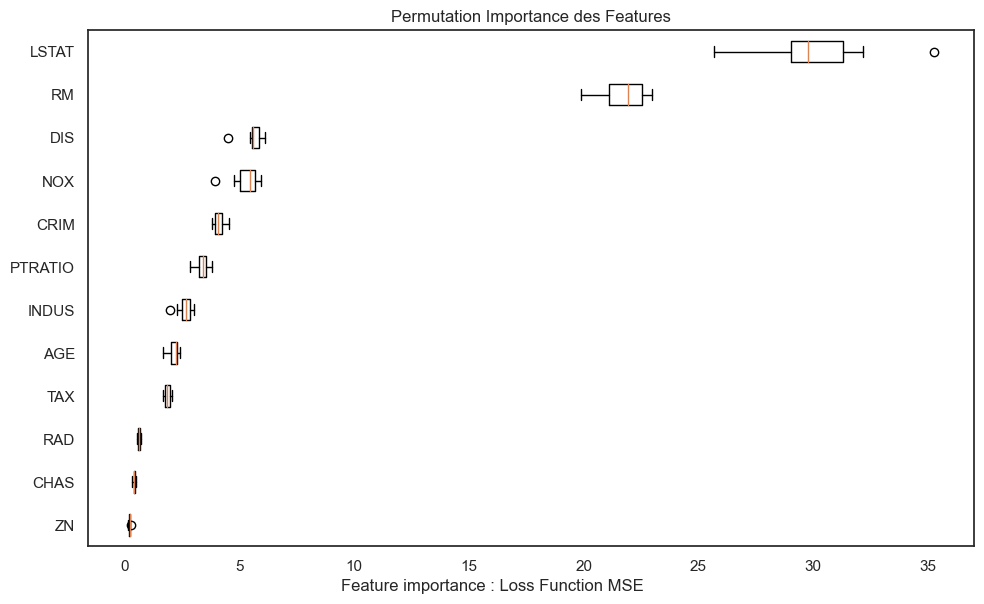

In [193]:
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Création du boxplot avec les bonnes étiquettes
ax1.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_test.columns[perm_sorted_idx]  # Remplace training_features par X_test.columns
)

plt.title('Permutation Importance des Features')
fig.text(.5, .001, "Feature importance : Loss Function MSE", ha='center')

fig.tight_layout()
plt.show()

Le tableau et le graphique de permutation feature importance montre l'impact de chaque variable sur la performance du modèle, mesuré par l'augmentation de l'erreur MSE lorsque les valeurs d'une variable sont aléatoirement permutées. Plus l'importance d'une variable est élevée, plus son absence perturbe le modèle. Dans ce cas, LSTAT et RM sont les variables les plus importantes, car leur perturbation entraîne une grande augmentation de l'erreur MSE. À l'inverse, des variables comme ZN, CHAS, et RAD ont un impact beaucoup plus faible, indiquant qu'elles contribuent moins à la prédiction de la variable cible.

# 7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

Nous passons maintenant à l'interprétation du modèle Random Forest en utilisant des Local model-Agnostic methode. Ces techniques permettent d'expliquer les prédictions du modèle pour des individus spécifiques, offrant ainsi une meilleure compréhension des décisions prises par le modèle à un niveau plus détaillé. Contrairement aux méthodes globales, qui analysent le comportement général du modèle, ces méthodes se concentrent sur l'impact des variables sur une prédiction individuelle. Nous explorerons successivement les méthodes ICE (Individual Conditional Expectation), LIME (Local Interpretable Model-Agnostic Explanations) et SHAP (SHapley Additive exPlanations) pour approfondir l'interprétation du modèle.

## Individual Conditional Expectation (ICE)

Les Individual Conditional Expectation (ICE) plots permettent de visualiser l'impact d'une variable sur les prédictions du modèle à l'échelle d'individus spécifiques. Contrairement aux Partial Dependence Plots (PDP) qui représentent l'effet moyen de la variation d'une caractéristique sur toutes les instances, l'ICE génère une ligne pour chaque instance, montrant ainsi comment la prédiction varie en fonction de l'évolution de la valeur d'une seule caractéristique, tout en maintenant les autres caractéristiques constantes. En d'autres termes, l'ICE permet de visualiser non seulement l'effet marginal d'une variable sur la prédiction, mais aussi de détecter si cet effet varie d'une instance à l'autre.

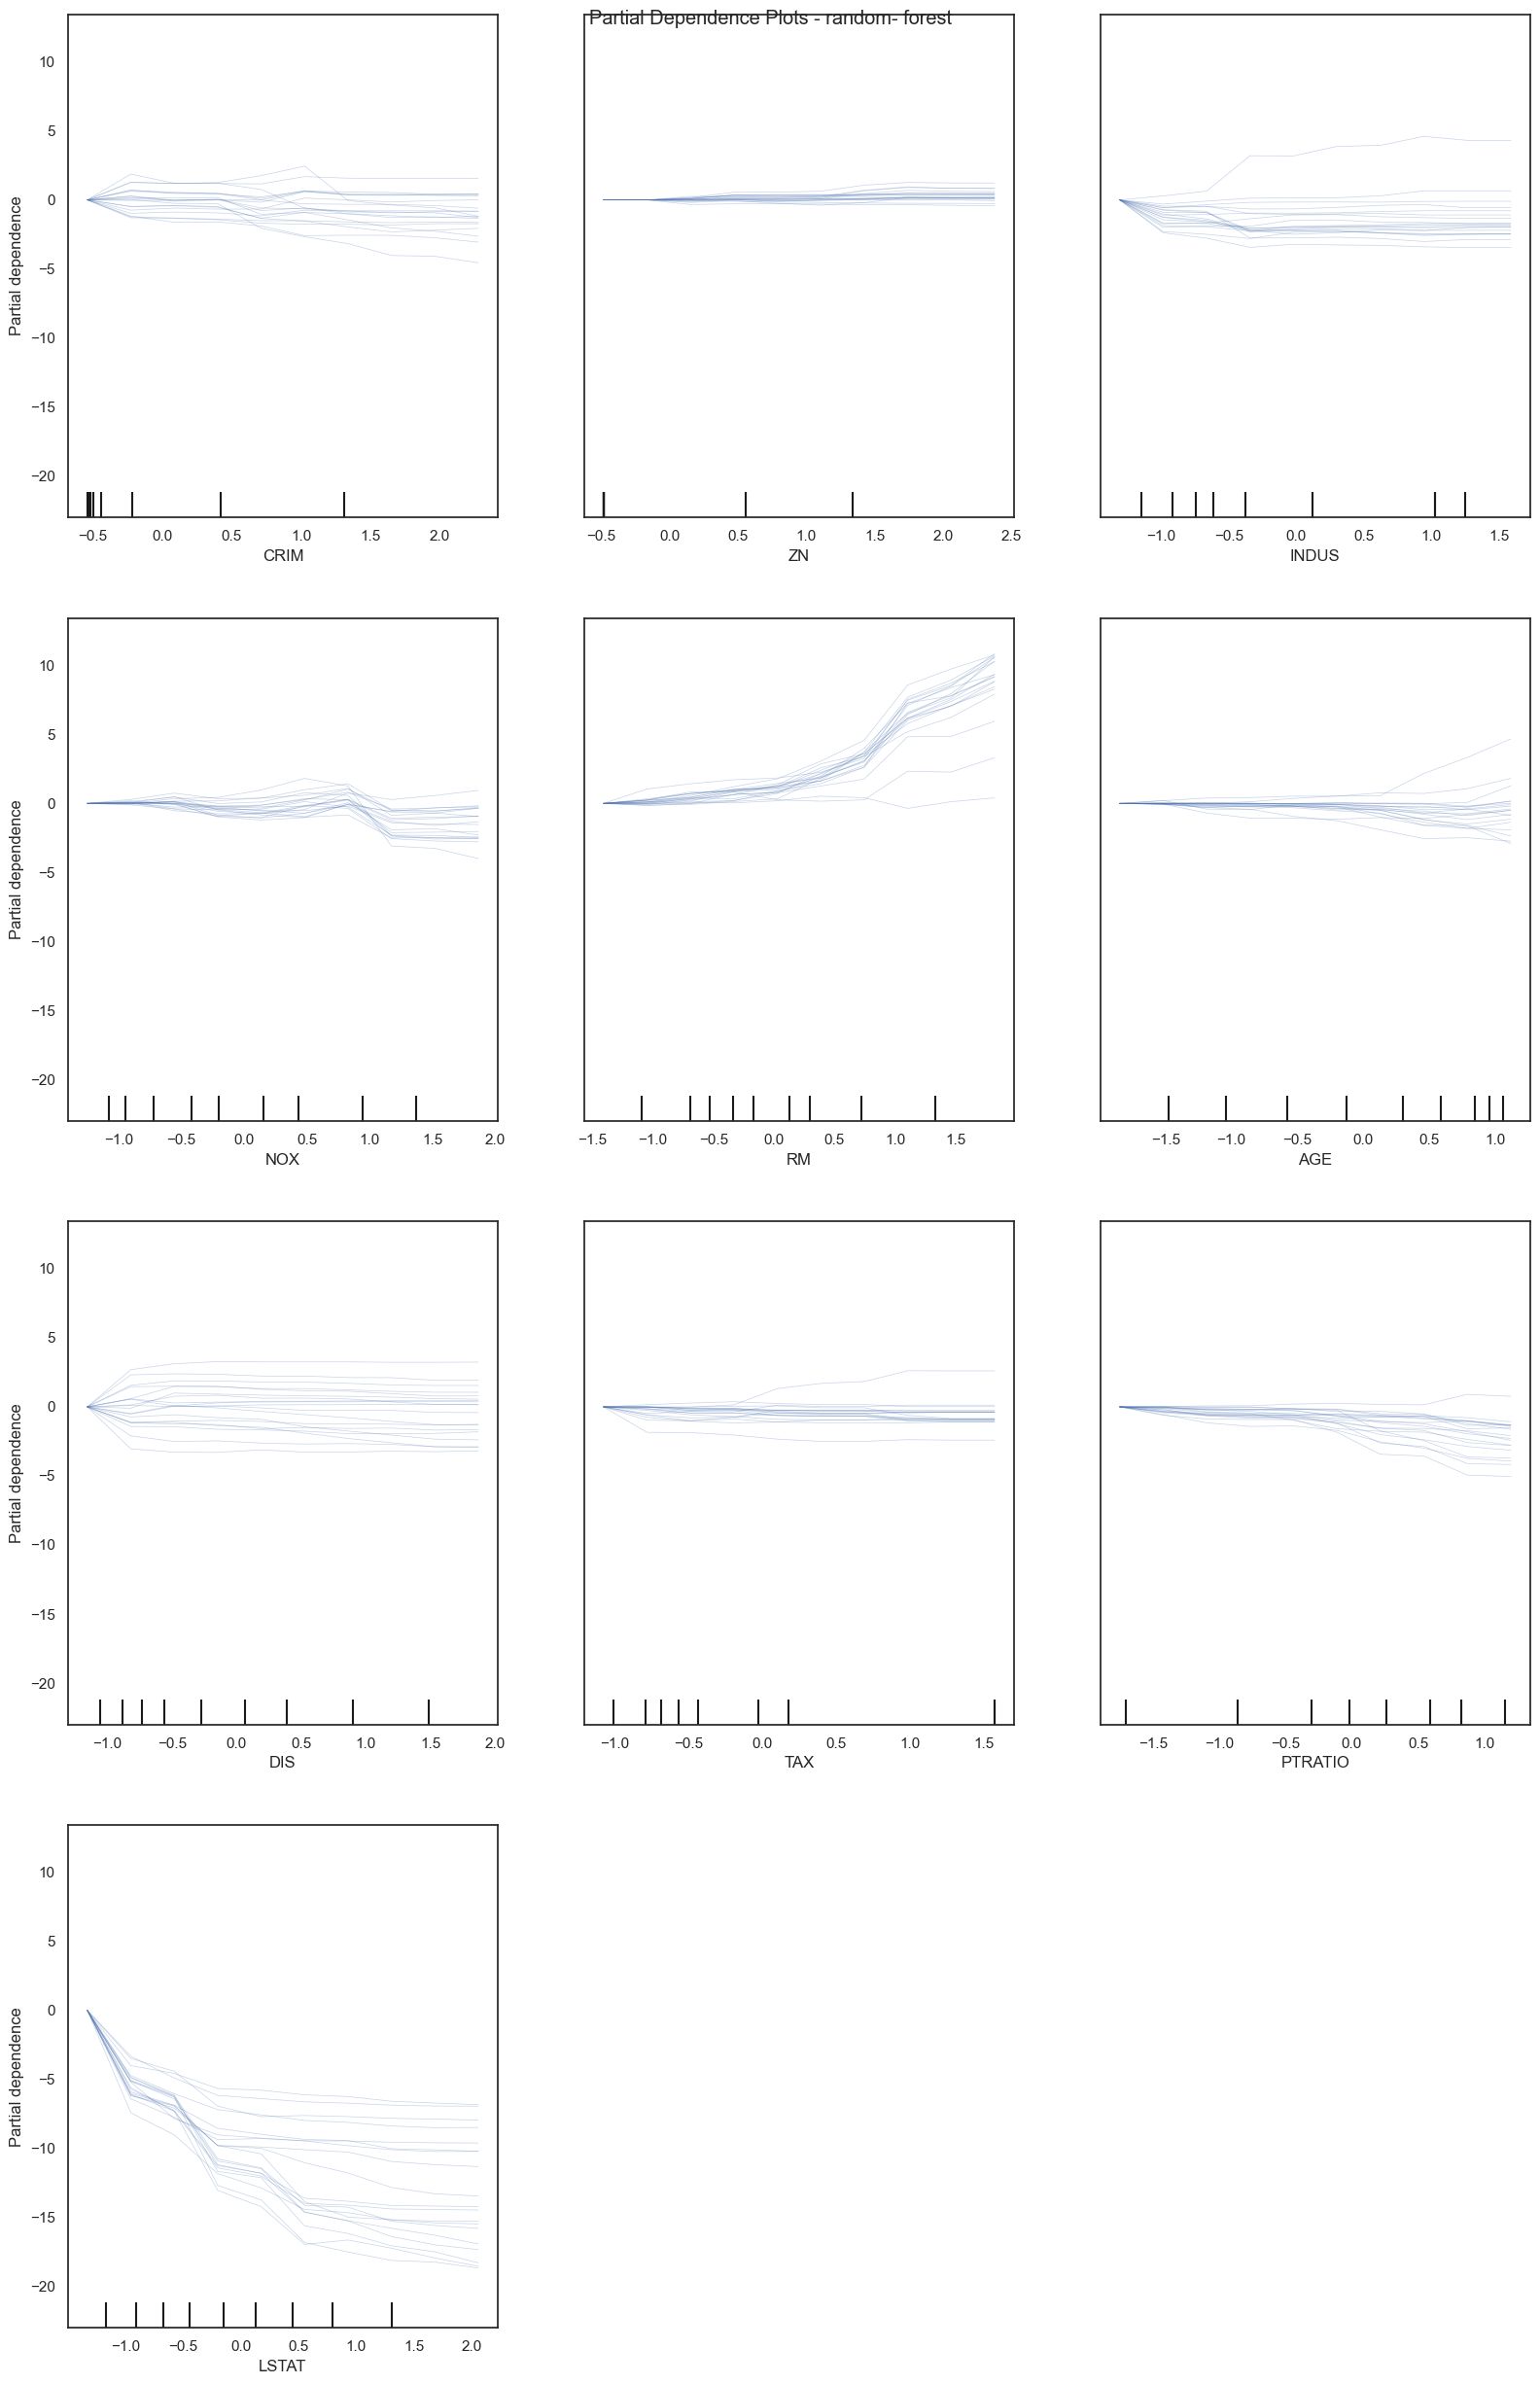

In [202]:
# ICE pour plusieurs caractéristiques quantitatives
features = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "LSTAT"]  # Index des caractéristiques
_, ax1 = plt.subplots(figsize = (16,25))
PartialDependenceDisplay.from_estimator(best_model_random,  #votre modèle
                                         X_train_se, 
                                         features,
                                         kind="individual", # On modifie ICI
                                         ax = ax1,
                                         grid_resolution=10, # Nombre de points estimés pour le tracer de la courbe
                                         n_cols=3,
                                         subsample=0.05, # 5% du jeu de données
                                         centered=True
                                         )
plt.suptitle("Partial Dependence Plots - random- forest")
plt.tight_layout()
plt.show()

Nous observons ici que, de manière générale, les valeurs médianes des maisons sont affectées de la même façon par les modifications des variables explicatives, à l'exception de certaines variables comme dIS et CRIM, où l'augmentation de ces variables entraîne des effets contrastés, certaines valeurs augmentant tandis que d'autres diminuent. En revanche, pour des variables telles que LSTAT, une augmentation conduit systématiquement à une baisse des valeurs médianes des maisons, bien que l'ampleur de cette baisse varie. Tout comme pour la variable RM, où l'augmentation de celle-ci conduit systématiquement à une augmentation de la valeur plus ou moins forte.

## Local surogate (LIME)

L'algorithme LIME (Local Interpretable Model-agnostic Explanations) permet d'expliquer localement la prédiction d'un modèle complexe en utilisant un modèle simple dans un voisinage de l'exemple à expliquer. Il génère un jeu de données perturbé autour de l'individu, en modifiant légèrement ses caractéristiques, et utilise un modèle simple pour analyser l'impact de chaque variable sur la prédiction. Nous allons appliquer LIME sur l'individu 65 pour comprendre l'impact de ses caractéristiques sur la prédiction du modèle.

In [348]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train_se.values, feature_names=X_train_se.columns.values.tolist(),
                                                  class_names=['MEDV'], verbose=True, mode='regression')

i = 65
exp = explainer.explain_instance(X_test.values[i], best_model_random.predict, num_features=5)

exp.show_in_notebook(show_table=True)

C:\Users\emmal\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 23.587483510728433
Prediction_local [26.73312921]
Right: 23.83549999999999


Selon les résultats obtenus pour l'individu 65, la valeur médiane prédite de la maison est de 23.84 milliers de dollars. Les six variables les plus influentes dans cette prédiction sont présentées ci-dessous.

Concernant la variable LSTAT, représentant le pourcentage de la population avec un statut socio-économique inférieur, on observe qu'un faible LSTAT a un impact positif sur la valeur prédite. En effet, pour cet individu, la valeur de LSTAT est de -0,80, ce qui contribue à augmenter la prédiction de 5,79. Cela suggère que les maisons situées dans des zones avec un faible pourcentage de personnes à statut socio-économique inférieur tendent à être évaluées à une valeur plus élevée.

La variable RM, qui représente le nombre moyen de chambres, a un effet négatif de 1,33 sur la prédiction pour cet individu, dont la valeur de RM est de 0,20. Cela indique qu'un nombre relativement faible de chambres diminue la valeur de la maison.

En ce qui concerne PTRATIO, qui mesure le rapport élèves/enseignant dans la localité, cette variable a également un effet négatif sur la prédiction, suggérant qu'un rapport plus élevé entre élèves et enseignants est associé à une diminution de la valeur de la maison.

La variable CHAS, indiquant si la maison est proche de la rivière Charles, a un impact négatif pour cet individu, qui ne réside pas près de la rivière. Cela montre que l'absence de proximité à la rivière semble réduire la valeur de la maison.

Enfin, la variable NOX, représentant la concentration des oxydes d'azonte, a un impact positif, bien que plus modéré.

En résumé, la valeur médiane prédite de 23,84 pour cet individu est influencée par plusieurs facteurs. Tandis que LSTAT et NOX favorisent une augmentation de la valeur, les autres variables, comme RM, PTRATIO, et CHAS entraînent une diminution de la valeur de la maison.

## Shapley Values (SHAP)

La méthode Shapley est une approche d'explicabilité basée sur la théorie des jeux qui attribue à chaque caractéristique une valeur en fonction de son impact sur la prédiction d'un modèle pour un individu donné. Elle calcule la contribution marginale de chaque variable en prenant en compte toutes les combinaisons possibles de caractéristiques, permettant ainsi une attribution précise de l'importance de chaque variable. Nous allons appliquer cette méthode pour analyser la prédiction de l'individu 74.

In [242]:
# Importer la librairie Shap
import shap 

# Définir le module explainer de Shap, attention ce n'est pas le même si c'est un modèle basé sur des abres

explainer = shap.TreeExplainer(best_model_random)

# On calcule les shap values, attention c'est très couteux en temps de calcul.

shap_values = explainer(X_train_se)

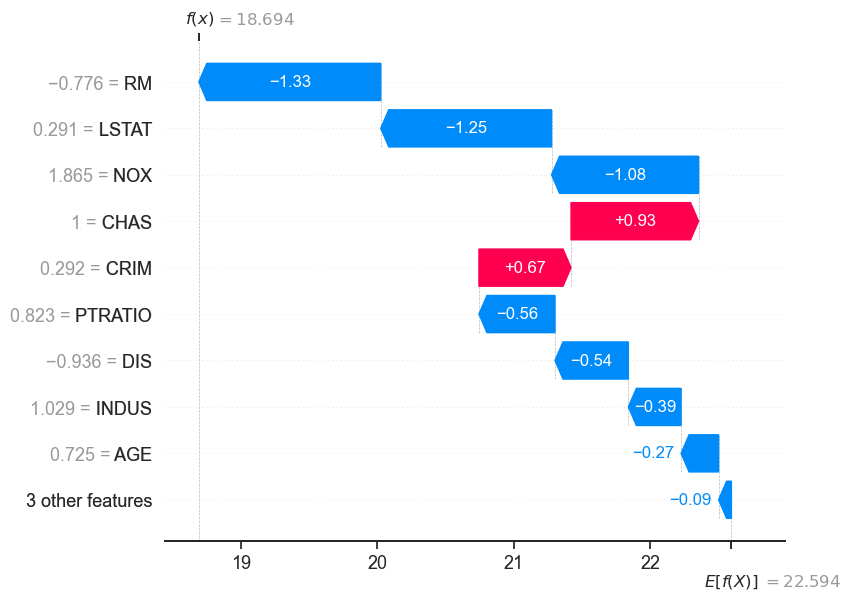

In [244]:
shap.initjs()
# visualize the first prediction's explanation
shap.waterfall_plot(shap_values[74])

In [246]:
shap.force_plot(shap_values[74])

Ainsi, grace à cette méthode, nous pouvons constater que pour l'individu 74, la valeur prédite est de 18.694 ce qui est inférieur à la moyenne qui est de 22.533. 

Seules les variables CHAS et CRIM contribuent à augmenter la valeur médiane de la maison.

# 8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

Enfin, nous explorons les graphiques SHAP à l'aide de visualisations telles que le beeswarm plot et le scatter plot, qui permettent de mieux comprendre l'impact des différentes variables sur les prédictions du modèle.

## Beeswarm

Après avoir calculé les valeurs de shapley pour les instances on cherche maintenant à avoir une vision d'ensemble du modèle. Une interprétation globale de notre modèle. Shap nous offre cette possibilité en calculant les valeurs pour un ensemble de point. Le passage à l'interprétation globale se fait en moyennisant les résultats individuels.

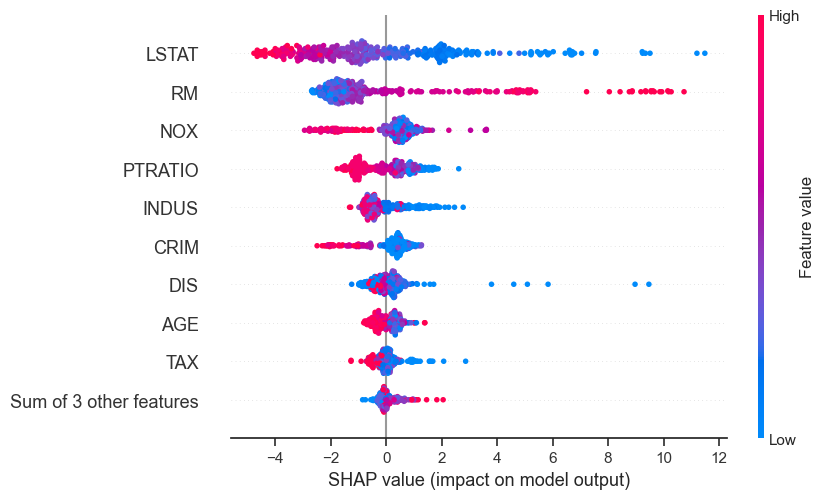

In [363]:
shap.plots.beeswarm(shap_values)

Nous observons que les variables LSTAT et RM semblent avoir la plus grande influence sur les valeurs de Shapley, étant les premières à apparaître dans le graphique. Ensuite, on remarque que la distribution de certaines variables, comme AGE et NOX, n'est pas monotone, avec des valeurs élevées et faibles qui se mélangent. En revanche, pour d'autres variables, on observe une distinction plus claire entre les couleurs. Par exemple, des valeurs faibles de LSTAT ont un impact positif sur la valeur de Shapley, tout comme TAX, DIS, INDUS, et PTRATIO. À l'inverse, RM suit une tendance différente : des valeurs élevées de RM ont un impact positif sur les valeurs de Shapley.

## Scatter

Enfin, SHAP propose un graphique similaire au Partial Dependence Plot, appelé scatter plot. Ce graphique permet d'examiner la relation entre les valeurs de Shapley et la distribution d'une variable spécifique. Il nous aide ainsi à comprendre l'impact d'une variable particulière sur notre variable d'intérêt. Nous allons effectuer ces plots essentiellement avec les variables LSTAT et RM que nous avons identifiées comme étant les plus importantes dans la prédiction de la valeur médiane des maisons.

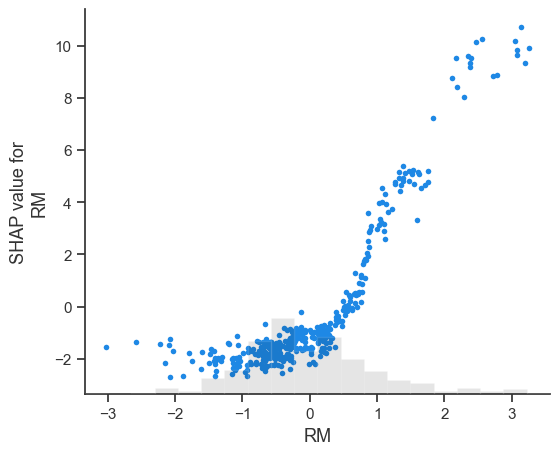

In [361]:
shap.plots.scatter(shap_values[:, 'RM'])

A l'aide du graphique ci-dessus, nous pouvons observer la forme de la distribution des valeurs sur le graphique, mais pour une meilleure interprétation, il est préférable de revenir aux valeurs d'origine. Nous recréons donc ce même graphique, ainsi que celui pour la variable LSTAT, en utilisant les valeurs non standardisées.

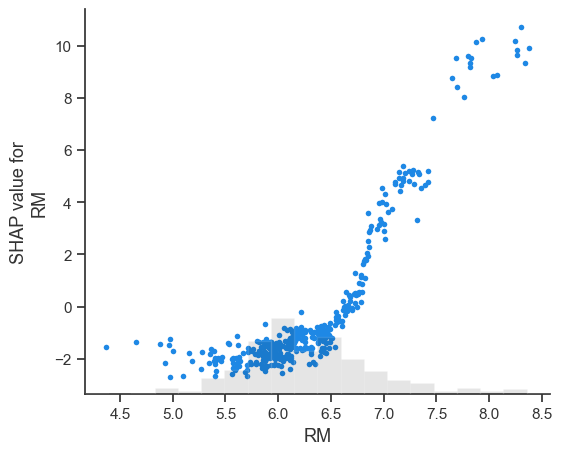

In [367]:
# Avec les valeurs d'origine
shap_values.data = X_train.to_numpy()

# Affichage du scatter plot pour une variable spécifique, ici 'RM'
shap.plots.scatter(shap_values[:, 'RM'])

Nous pouvons constater que les shapley value pour RM augmente de façon exponentiel lorsque RM dépasse 6 donc lorsque le nombre moyen de pièces par logement dépasse 6. Cela signifie que...

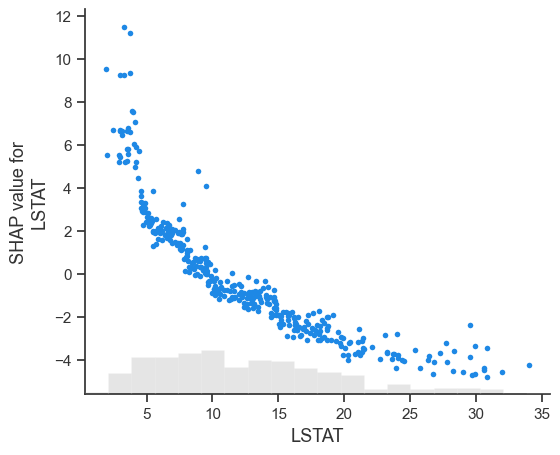

In [369]:
shap_values.data = X_train.to_numpy()

# Affichage du scatter plot pour une variable spécifique, ici 'RM'
shap.plots.scatter(shap_values[:, 'LSTAT'])

Nous pouvons constater que les valeurs de Shapley pour la variable RM augmentent de manière exponentielle lorsque le nombre moyen de pièces par logement dépasse 6. Cela signifie qu'au-delà de ce seuil, une augmentation du nombre de pièces a un impact de plus en plus important sur la valeur prédite, indiquant une forte influence de cette caractéristique sur l'estimation de la valeur des maisons.

Finalement, pour la variable LSTAT, nous observons que la valeur de Shapley diminue considérablement entre 0 et 20, puis se stabilise. Cela suggère que, pour les valeurs faibles à modérées de LSTAT, l'augmentation du pourcentage de la population à statut socio-économique inférieur fait fortement baisser la valeur prédite de la maison, mais une fois que cette proportion atteint un certain seuil, l'impact devient moins significatif.

# Conclusion

Pour conclure, nous avons comparé les performances des modèles RandomForest et linéaire. Comme mentionné précédemment, le modèle RandomForest montre une meilleure capacité prédictive et explicative, comme en témoignent les critères R² et MSE. Cependant, les deux modèles identifient des variables similaires comme les plus influentes pour expliquer la valeur médiane des maisons occupées par leurs propriétaires. En particulier, le pourcentage de la population à statut socio-économique inférieur (LSTAT) et le nombre moyen de pièces (RM) émergent comme des facteurs clés, avec un impact négatif pour LSTAT et un impact positif pour RM.

L'application de méthodes d'explicabilité telles que les techniques globales (PDP, Permutation Feature Importance) et locales (ICE, LIME, SHAP) sur le modèle RandomForest a permis de rendre ce modèle interprétable, le rendant ainsi aussi attractif qu'un modèle linéaire, qui est souvent privilégié pour sa simplicité d'interprétation.